## **House Prices Prediction: Advanced Regression Techniques**

#### Phase I: Data Analysis Phase

In data analysis phase, our main goal is to get more insight information on the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Display all the columns of the given dataset:
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("house-prices-advanced-regression-techniques\\train.csv")

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape


(1460, 81)

#### Figuring out number of missing values in the features:


In [5]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
#This comprehension will extract all the features with NAN values inside them

#Calculating the percent of nan values per feature label
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),"% missing values") 

# taking out the mean of missing values in each feature label and then rounding upto 4 dp

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


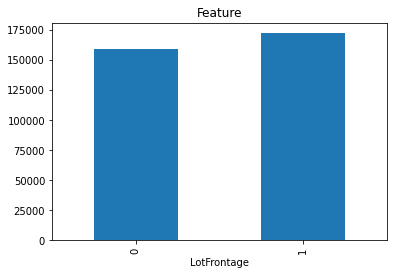

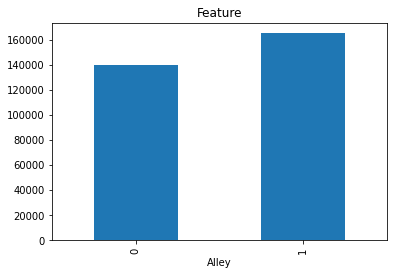

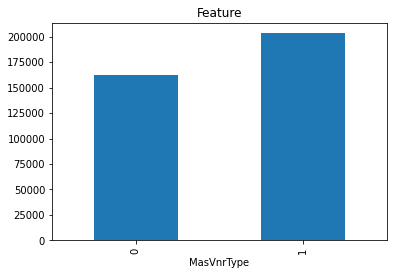

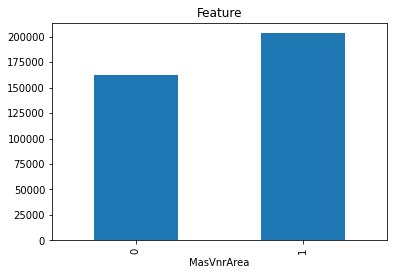

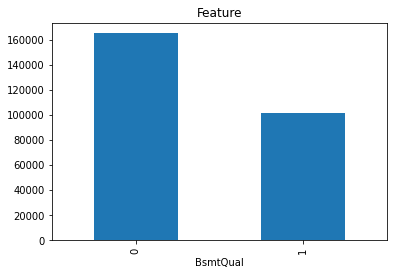

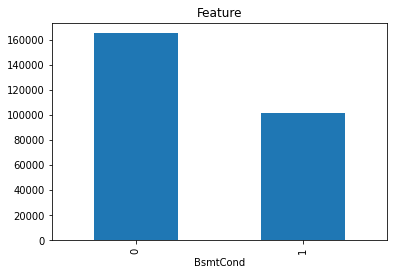

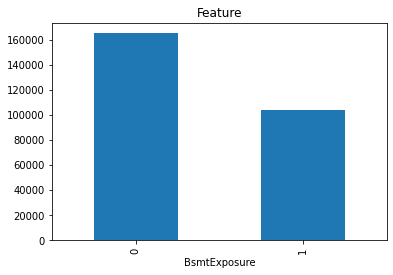

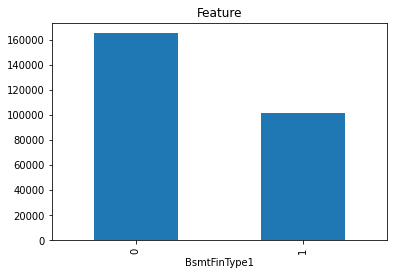

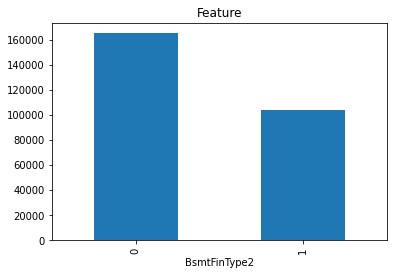

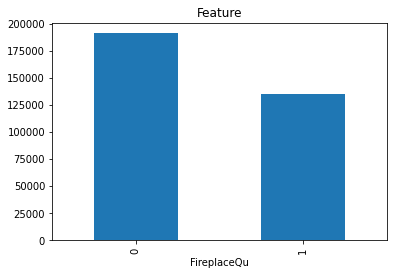

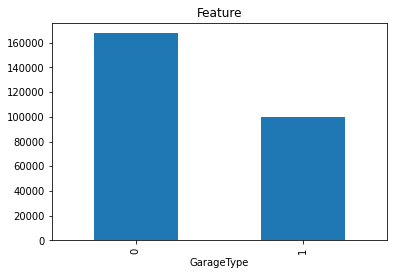

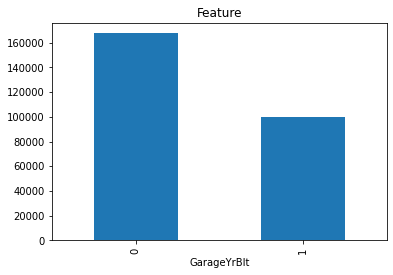

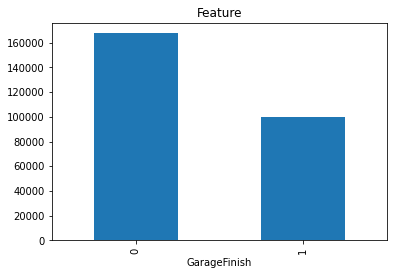

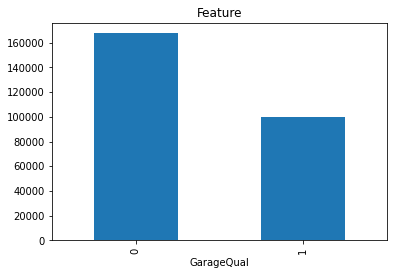

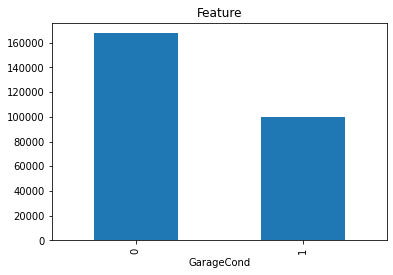

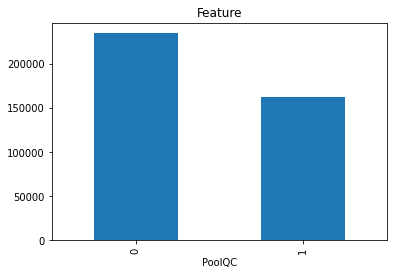

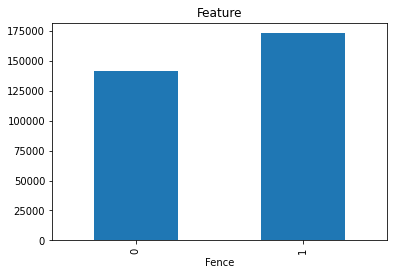

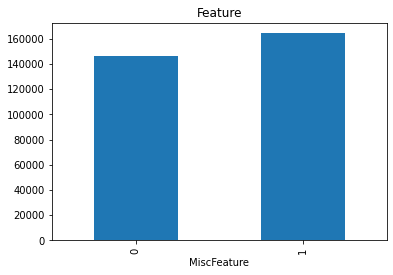

In [6]:
for feature in features_with_na:
    data = df.copy() #creating a copy of the dataset

    #Lets create a variable which will contain 1 for nan values and 0 for non-nan values:
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    #Lets see the mean of SalePrice with missing observation and non-missing observations:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title("Feature") 
    plt.show()

In [7]:
#Taking out all the numeric values, 

numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'object']

#Total number of numerical features
print("Total numerical features: ", len(numeric_feature))

#Displaying all the numerical features
df[numeric_feature].head()

Total numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


**Temporal variables (aka DateTime Variables)**

In [8]:
#Extracting features that are associated to DateTime(ie. years)

year_feature = [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [9]:
#Exploring the unique values of these features

for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'HousePrice Vs. YearSold')

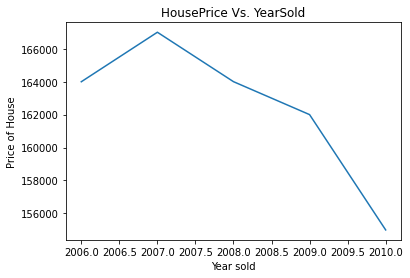

In [10]:
#Checking relationship between YrSold and SalePrice

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('Price of House') 
plt.title('HousePrice Vs. YearSold')

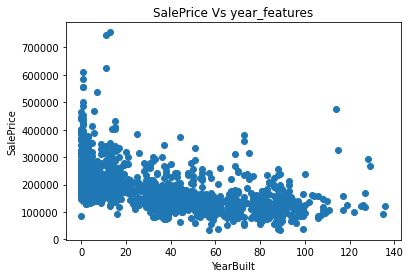

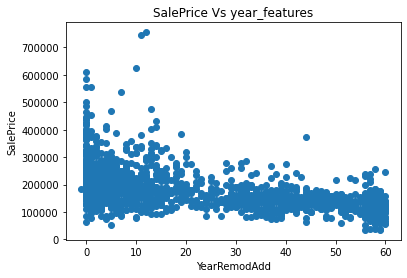

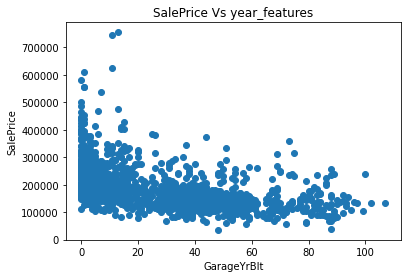

In [11]:
#Lets see the relationship between all year features and SalePrice:
for feature in year_feature:
    if feature != 'YrSold': 
        data = df.copy()

        #Difference between the year_features and the Year when the house was sold:
        data[feature] = data['YrSold'] - data[feature]

        #plotting scatter-plots for SalePrice and year_features:
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice') 
        plt.title("SalePrice Vs year_features") 
        plt.show()


### Analyzing Numerical values:

In [12]:
discrete_features = [feature for feature in numeric_feature if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Total count of Discrete Variables: ", len(discrete_features))

### *** len(df[feature].unique)<25 acts like a threshold value.

Total count of Discrete Variables:  17


In [13]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [14]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

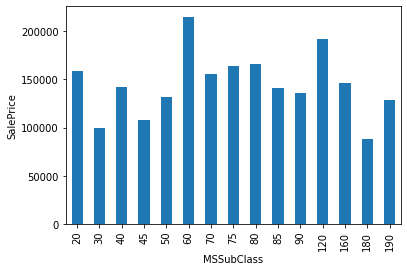

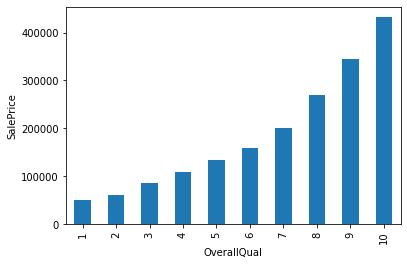

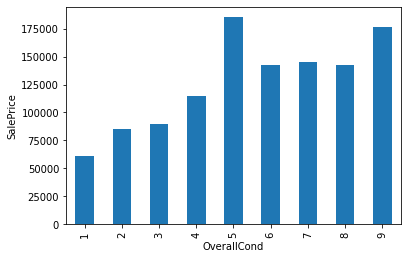

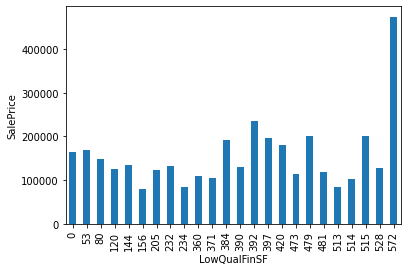

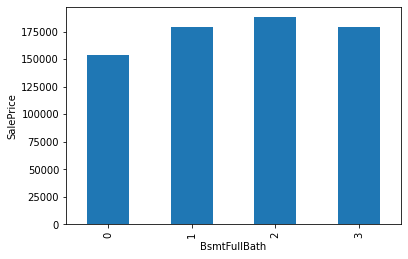

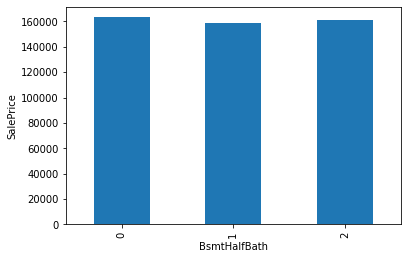

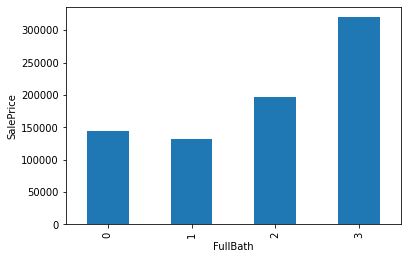

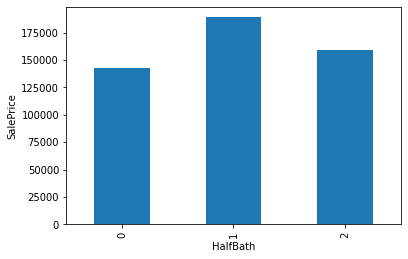

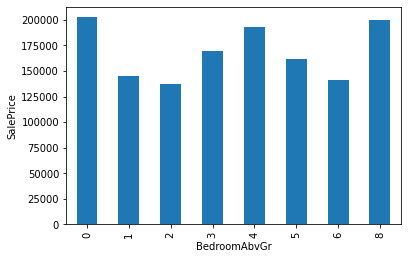

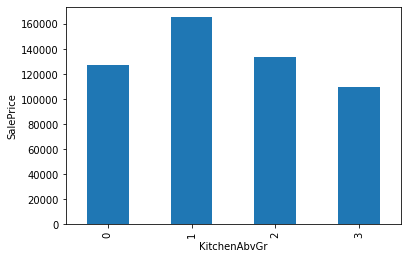

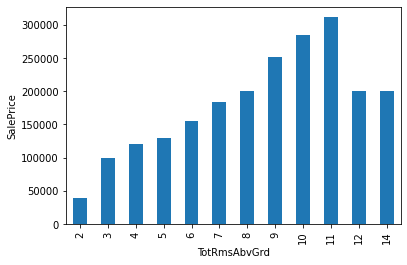

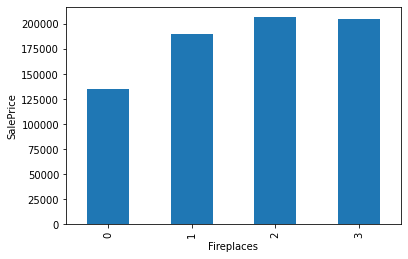

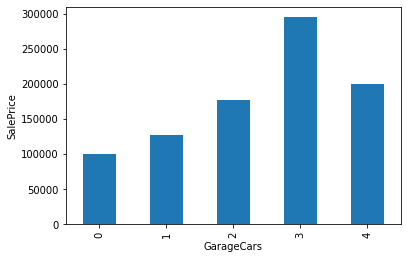

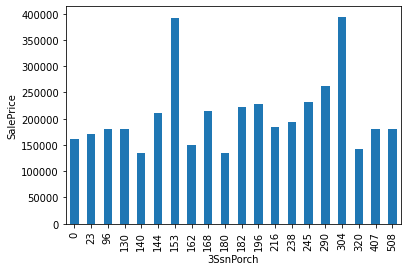

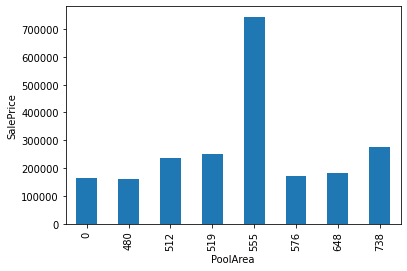

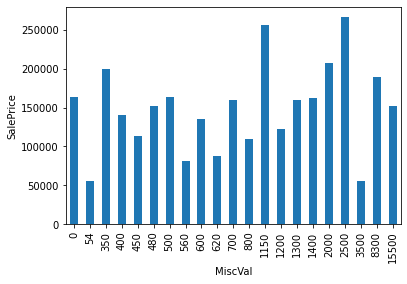

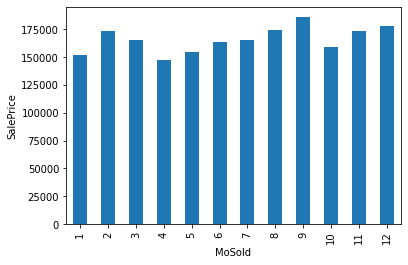

In [15]:
#Observing relationship b/w our Discrete Features and SalePrice(dependant feature):


for feature in discrete_features:
    data = df.copy()

    #Plotting bar charts of SalePrice Vs. Discrete_features
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice') 
    plt.show()

<AxesSubplot:xlabel='OverallQual'>

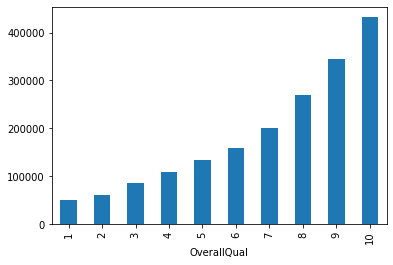

In [16]:
data.groupby('OverallQual')['SalePrice'].median().plot.bar()

The relation between OverallQuality and Sale price is an Exponential relation

In [17]:
#Extracting Continous features

continous_feature = [feature for feature in numeric_feature if feature not in discrete_features+['Id']]


In [18]:
continous_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice']

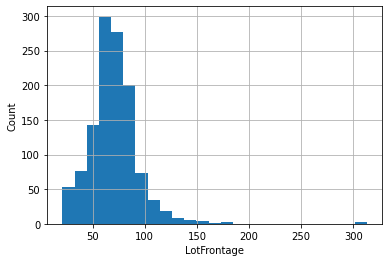

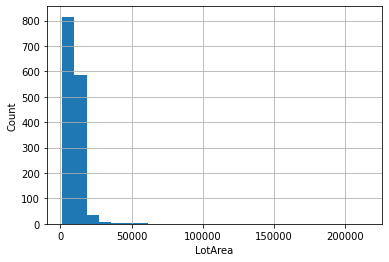

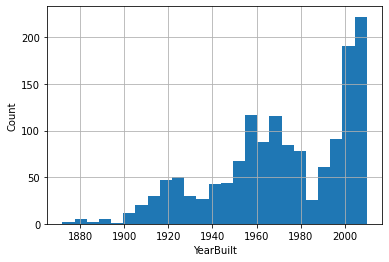

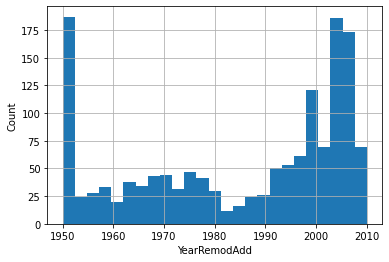

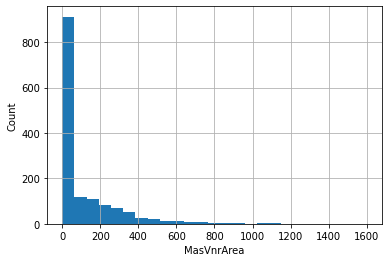

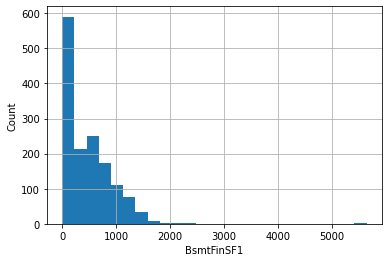

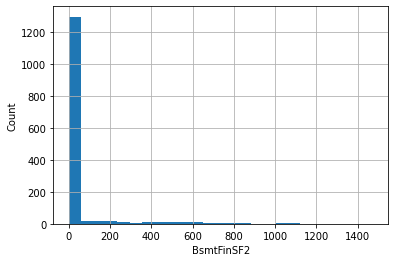

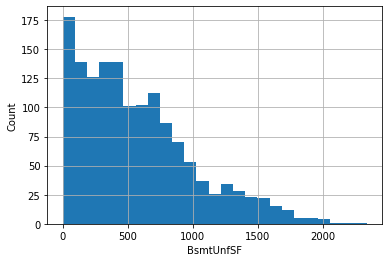

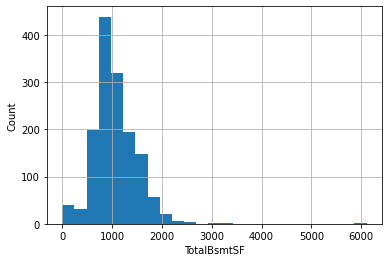

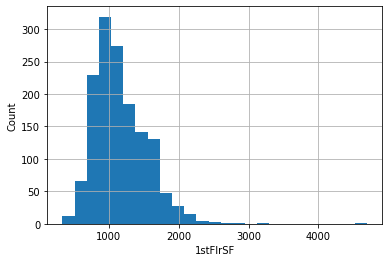

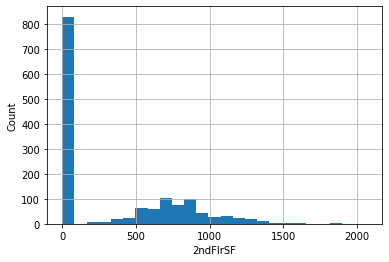

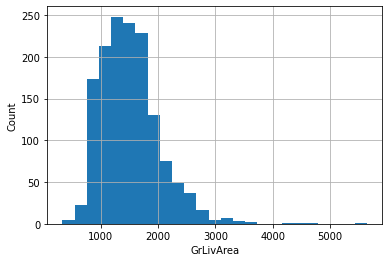

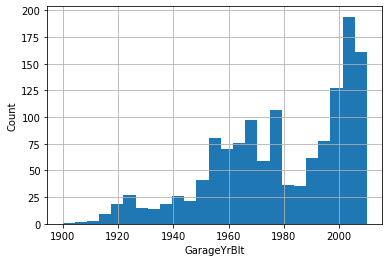

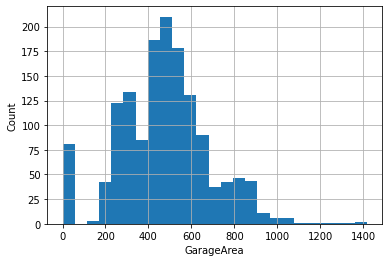

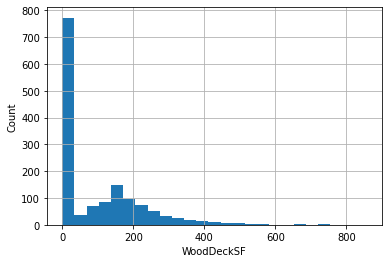

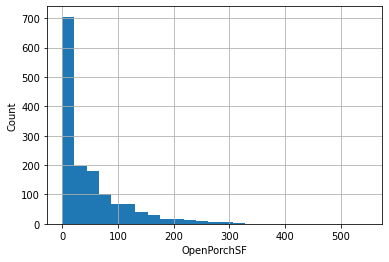

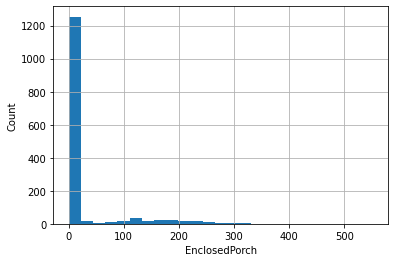

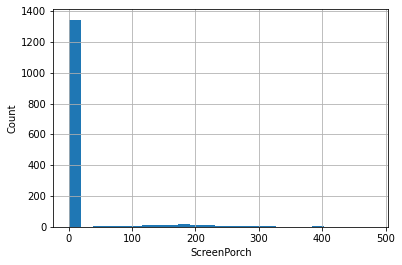

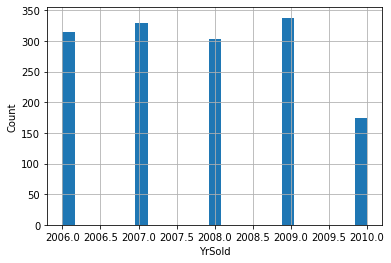

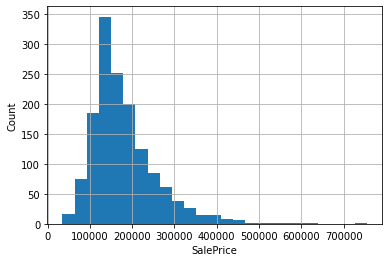

In [19]:
for feature in continous_feature:
    data = df.copy()

    #Observing relationships between continous features and the SalePrice
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

our data somewhat resembles gaussian/normal distribution pattern but not completely, so we have to normalize it to resemble the gaussian distribution 

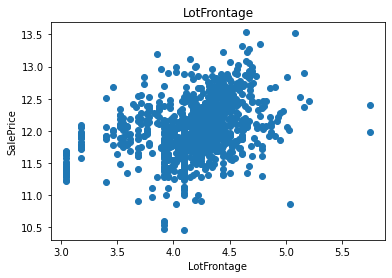

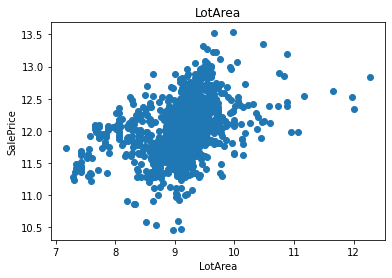

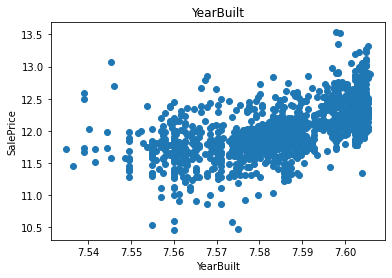

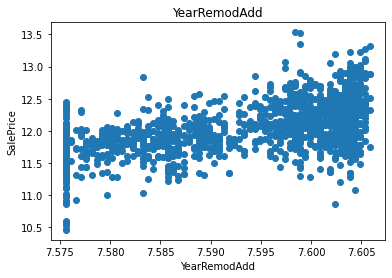

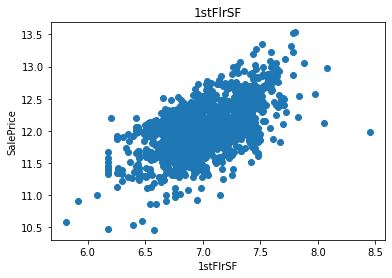

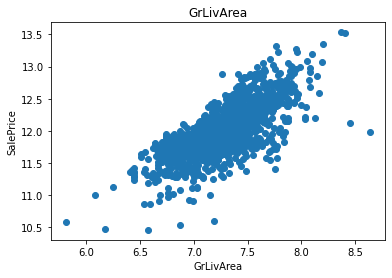

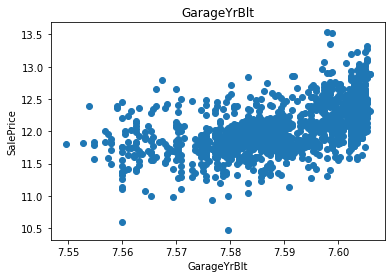

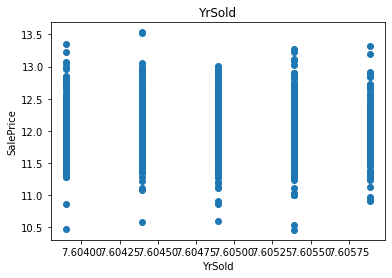

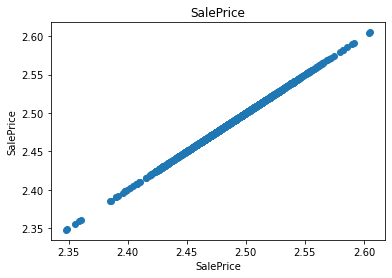

In [20]:
#Using Logarithmic Transformation we will, transform the skewed data into unskewed data

for feature in continous_feature:
    data = df.copy()

    if 0 in data[feature].unique():
        pass
    #We did this step, to avoid the log(0) condition, :. log 0 = undefined
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #Converting our normal values into log values for continous features and Sale price

        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice') 
        plt.title(feature)
        plt.show()

### Finding Outliers:

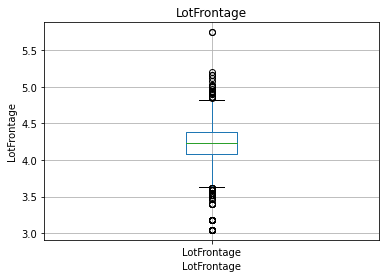

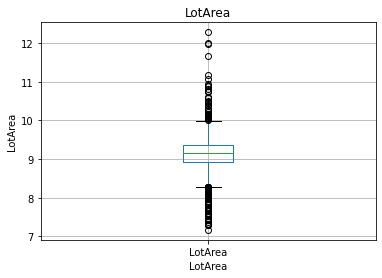

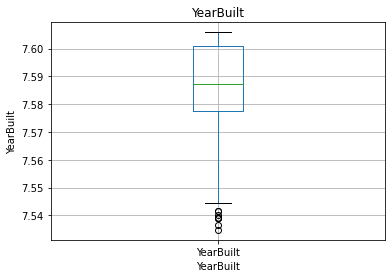

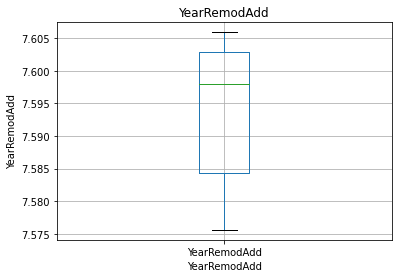

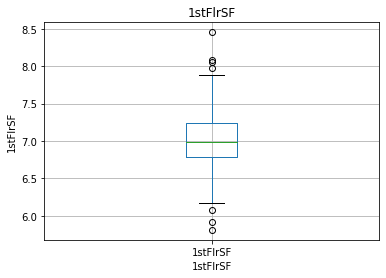

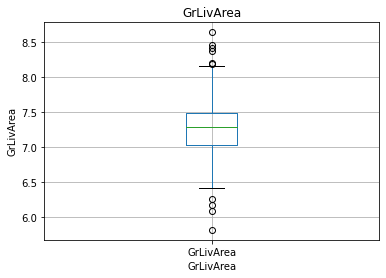

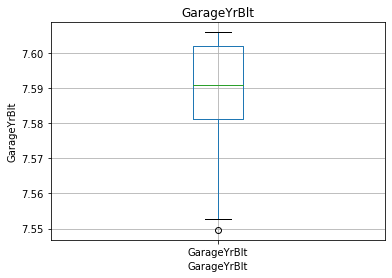

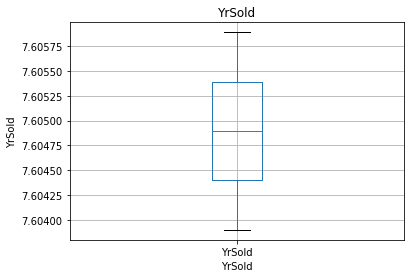

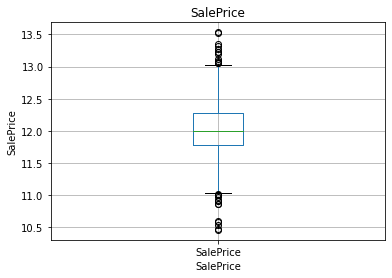

In [21]:
for feature in continous_feature:
    data = df.copy()

    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])

        #plotting a boxplot to get hold of the outliers
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables and their Operations:


In [22]:
#Extracting categorical variables from the dataset

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Total no. of categorical features: ", len(categorical_features))


Total no. of categorical features:  43


In [23]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [28]:
#Lets check the Cardinality of these Features:

for feature in categorical_features:
    print("The feature name {} and number of unique values {}".format(feature, len(df[feature].unique())))

The feature name MSZoning and number of unique values 5
The feature name Street and number of unique values 2
The feature name Alley and number of unique values 3
The feature name LotShape and number of unique values 4
The feature name LandContour and number of unique values 4
The feature name Utilities and number of unique values 2
The feature name LotConfig and number of unique values 5
The feature name LandSlope and number of unique values 3
The feature name Neighborhood and number of unique values 25
The feature name Condition1 and number of unique values 9
The feature name Condition2 and number of unique values 8
The feature name BldgType and number of unique values 5
The feature name HouseStyle and number of unique values 8
The feature name RoofStyle and number of unique values 6
The feature name RoofMatl and number of unique values 8
The feature name Exterior1st and number of unique values 15
The feature name Exterior2nd and number of unique values 16
The feature name MasVnrType

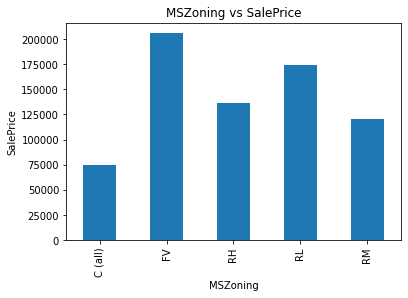

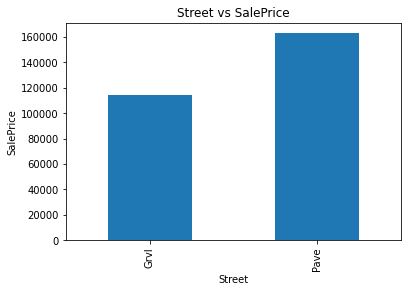

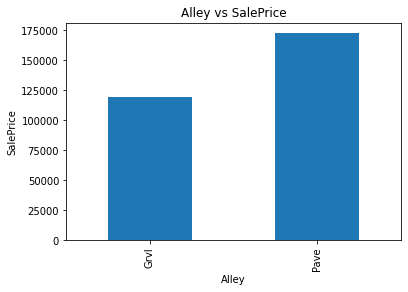

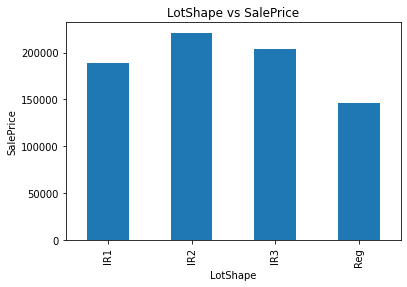

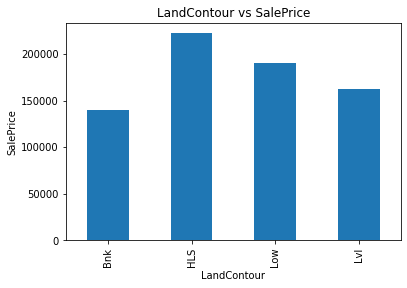

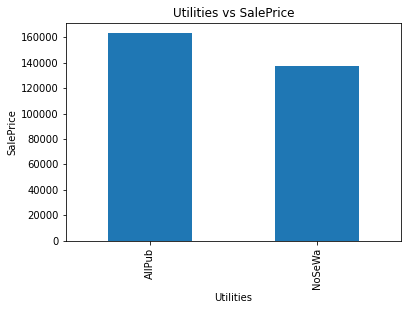

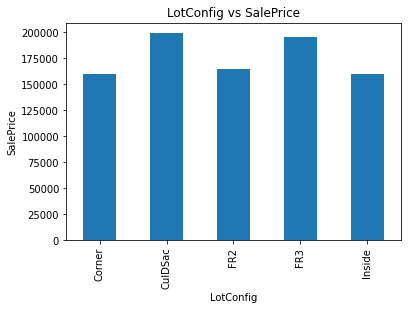

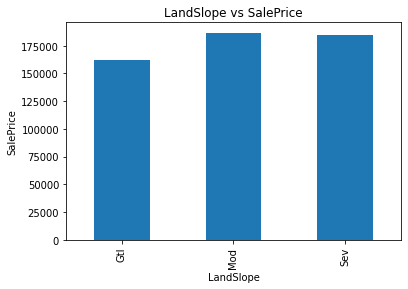

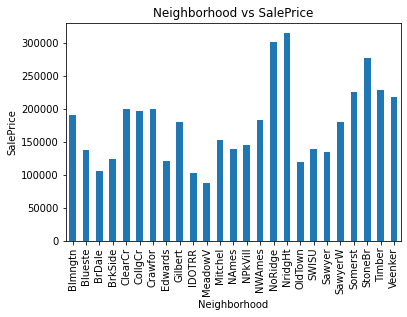

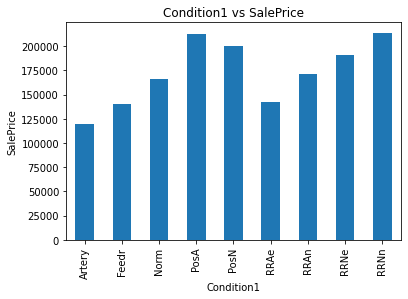

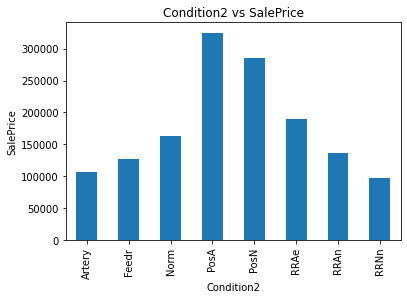

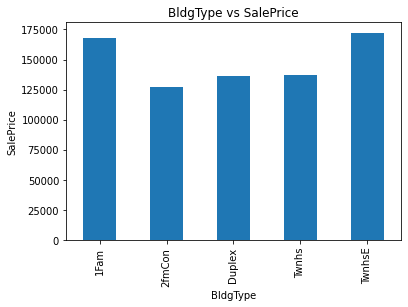

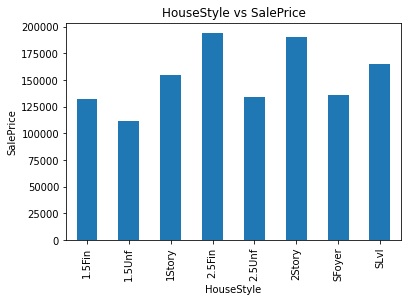

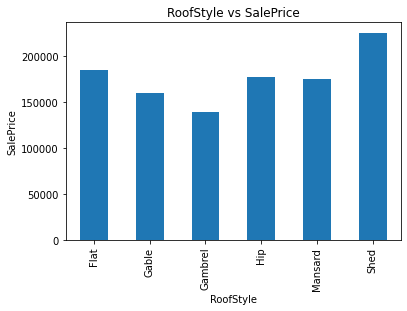

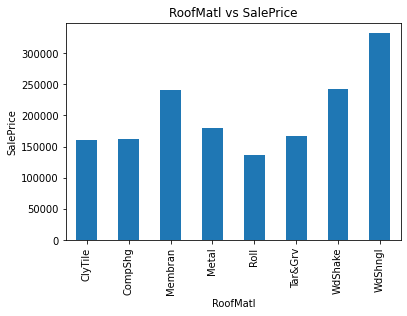

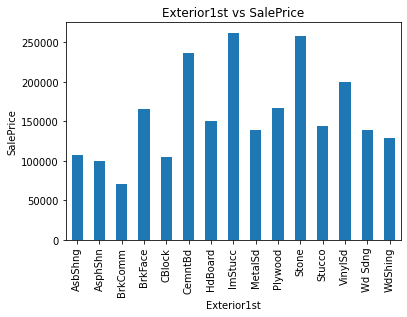

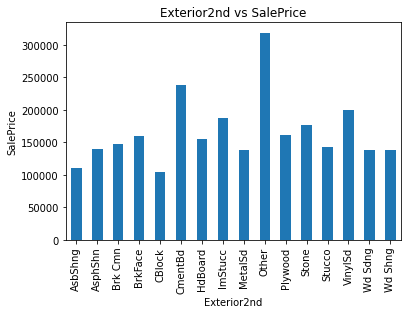

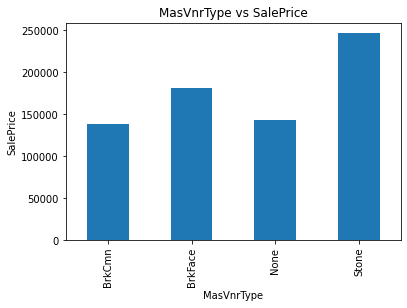

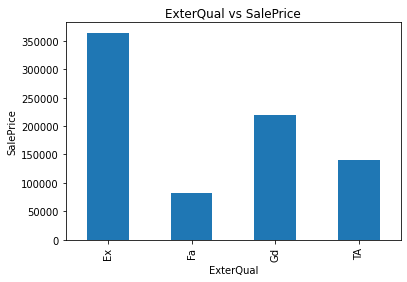

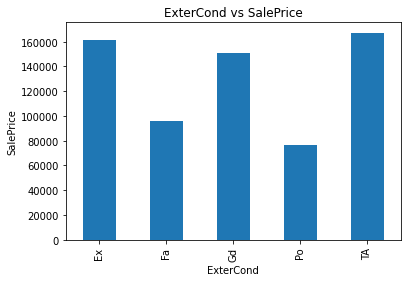

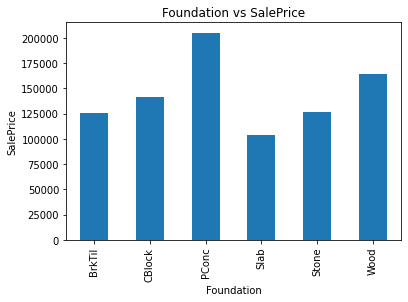

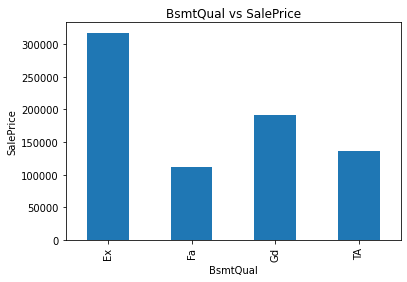

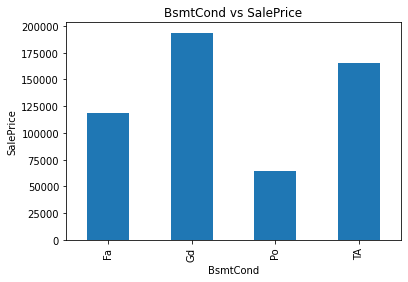

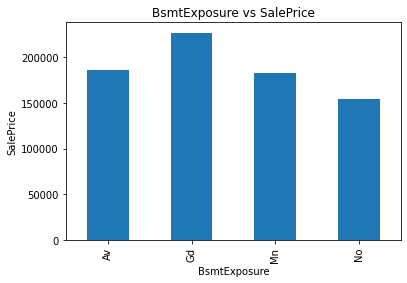

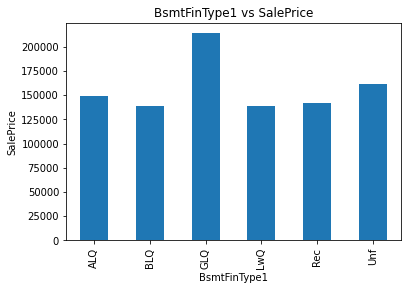

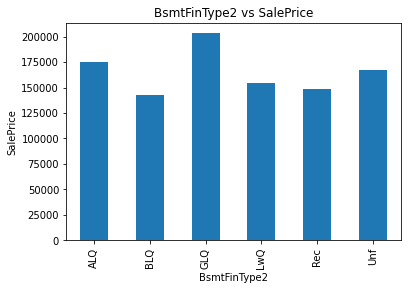

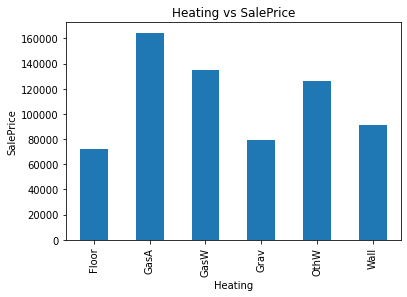

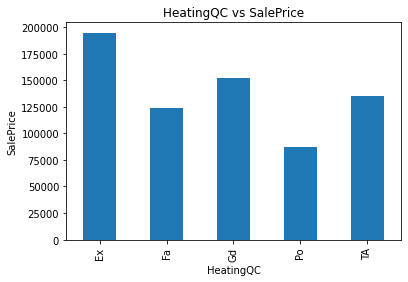

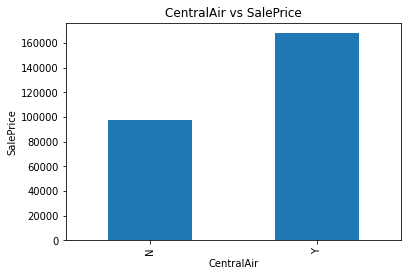

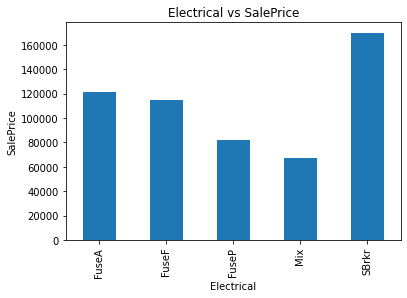

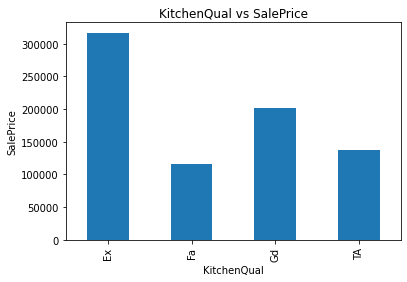

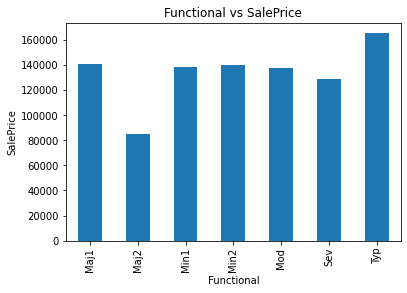

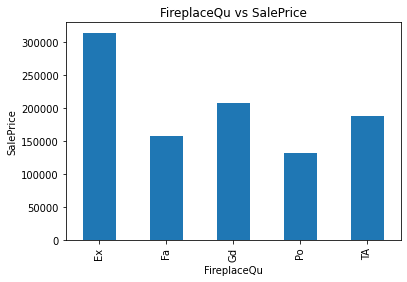

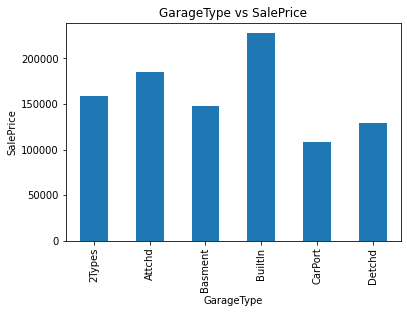

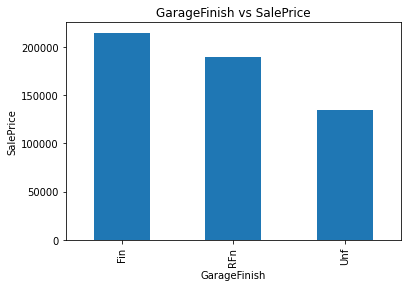

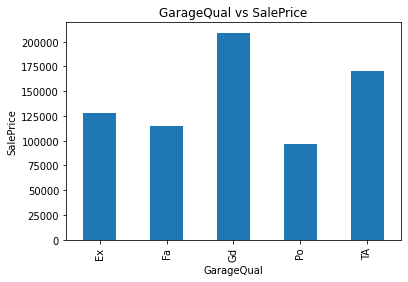

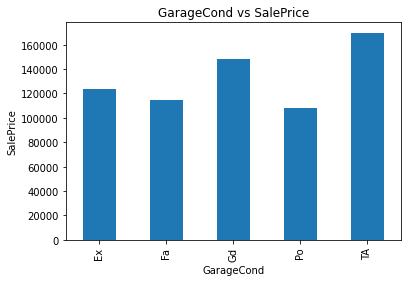

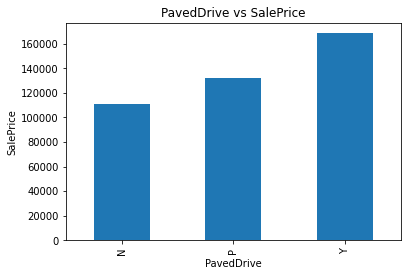

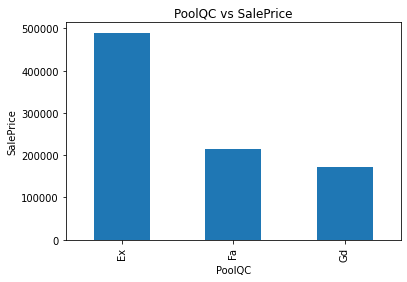

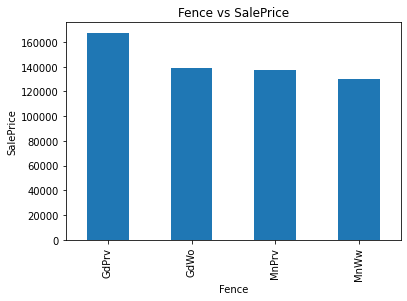

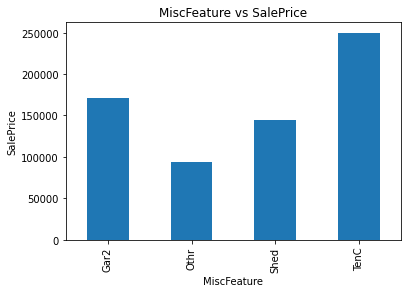

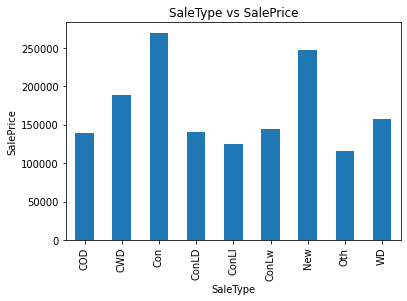

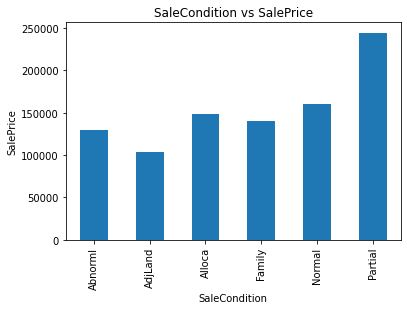

In [29]:
for feature in categorical_features:
    data = df.copy()

    #Plotting relations between SalePrice and Categorical_Features:

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice') 
    plt.title(f'{feature} vs SalePrice') 
    plt.show()